# UltraLytics YOLO v3 Image Detection 같이하기

## UltraLytics YOLO v3 설치

![install](https://github.com/DrKAI/CV/raw/main/UltraLytics_manual/yolov3_install.png)

[Install Page](https://github.com/ultralytics/yolov3#quick-start-examples)

* UltraLytics git에서 복사하기

In [1]:
!git clone https://github.com/ultralytics/yolov3.git

Cloning into 'yolov3'...
remote: Enumerating objects: 11245, done.
remote: Counting objects: 100% (1167/1167), done.
remote: Compressing objects: 100% (517/517), done.
remote: Total 11245 (delta 814), reused 950 (delta 649), pack-reused 10078
Receiving objects: 100% (11245/11245), 9.99 MiB | 24.66 MiB/s, done.
Resolving deltas: 100% (7613/7613), done.


In [2]:
temp_str = 'setuptools<=64.0.2\n'

f = open('/content/yolov3/requirements.txt', 'r')
f_str = f.readlines()
f.close()

f2 = open('/content/yolov3/requirements.txt', 'w')

for idx, val in enumerate(f_str):
  if 'setuptools' in val:
    idx_v = idx
    f_str.remove(val)
    f_str.insert(idx_v, temp_str)

for val in f_str:
  f2.write(val)

f2.close()

* yolov3 폴더 이동 및 requirements.txt 내부 패키지 설치

In [3]:
!cd yolov3; pip install -r /content/yolov3/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is 

## Image Detection

1. 예제 이미지 다운로드

2. COCO Dataset으로 pretrained 된 weights 다운로드
    - weights가 없으면 자동 다운로드

3. detect.py를 python으로 직접 호출하여 수행

### 1) 예제 이미지 다운로드

    !wget -O [저장할 파일명] [파일 주소]

In [4]:
!wget -O /content/yolov3/data/images/14th_street.jpg https://raw.githubusercontent.com/DrKAI/image/main/14th_Street_2005.jpg

--2024-02-08 02:10:44--  https://raw.githubusercontent.com/DrKAI/image/main/14th_Street_2005.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 547497 (535K) [image/jpeg]
Saving to: ‘/content/yolov3/data/images/14th_street.jpg’

/content/yolov3/dat 100%[===================>] 534.67K  --.-KB/s    in 0.04s   

2024-02-08 02:10:44 (11.8 MB/s) - ‘/content/yolov3/data/images/14th_street.jpg’ saved [547497/547497]



### 2) Pretrained weights 다운로드

![Pretrained weights](https://github.com/DrKAI/CV/raw/main/UltraLytics_manual/yolov3_pretrained.png)
![Pretrained weights2](https://github.com/DrKAI/CV/raw/main/UltraLytics_manual/yolov3_pretrained2.png)

[Pretrained weights Page](https://github.com/ultralytics/yolov3/releases)

* pretrained weights 저장 폴더 생성

      !mkdir [경로/디렉토리 명]

In [5]:
!mkdir /content/yolov3/pretrained

* pretrained weights 다운로드

In [6]:
!wget -O /content/yolov3/pretrained/yolov3-tiny.pt https://github.com/ultralytics/yolov3/releases/download/v9.6.0/yolov3-tiny

--2024-02-08 02:10:44--  https://github.com/ultralytics/yolov3/releases/download/v9.6.0/yolov3-tiny
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-02-08 02:10:44 ERROR 404: Not Found.



### 3) detect.py 실행

- 명령어 도움말 : python detect.py -h

In [7]:
!cd yolov3; python detect.py -h

usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE] [--data DATA]
                 [--imgsz IMGSZ [IMGSZ ...]] [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img] [--save-txt] [--save-conf]
                 [--save-crop] [--nosave] [--classes CLASSES [CLASSES ...]] [--agnostic-nms]
                 [--augment] [--visualize] [--update] [--project PROJECT] [--name NAME]
                 [--exist-ok] [--line-thickness LINE_THICKNESS] [--hide-labels] [--hide-conf]
                 [--half] [--dnn] [--vid-stride VID_STRIDE]

options:
  -h, --help            show this help message and exit
  --weights WEIGHTS [WEIGHTS ...]
                        model path or triton URL
  --source SOURCE       file/dir/URL/glob/screen/0(webcam)
  --data DATA           (optional) dataset.yaml path
  --imgsz IMGSZ [IMGSZ ...], --img IMGSZ [IMGSZ ...], --img-size IMGSZ [IMGSZ ...]
                        inference size h,w


In [15]:
!cd yolov3; python detect.py \
    --weights '/content/yolov3/pretrained/yolov3-tiny.pt' \
    --source '/content/yolov3/data/images/14th_street.jpg' \
    --project '/content/yolov3/detected' \
    --name 'images' \
    --img 640 \
    --conf-thres 0.5 \
    --iou-thres 0.4 \
    --line-thickness 2 \
    --exist-ok
    # --device CPU

detect: weights=['/content/yolov3/pretrained/yolov3-tiny.pt'], source=/content/yolov3/data/images/14th_street.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.4, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/yolov3/detected, name=images, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-165-g2d6d601 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov3/detect.py", line 278, in <module>
    main(opt)
  File "/content/yolov3/detect.py", line 273, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov3/detect.py", line 113, in run
    model =

## Detect Image 살펴보기

* 라이브러리 설치

In [9]:
from IPython.display import Image
from google.colab import files

* Image( ) 사용

      Image(filename=[파일 경로])

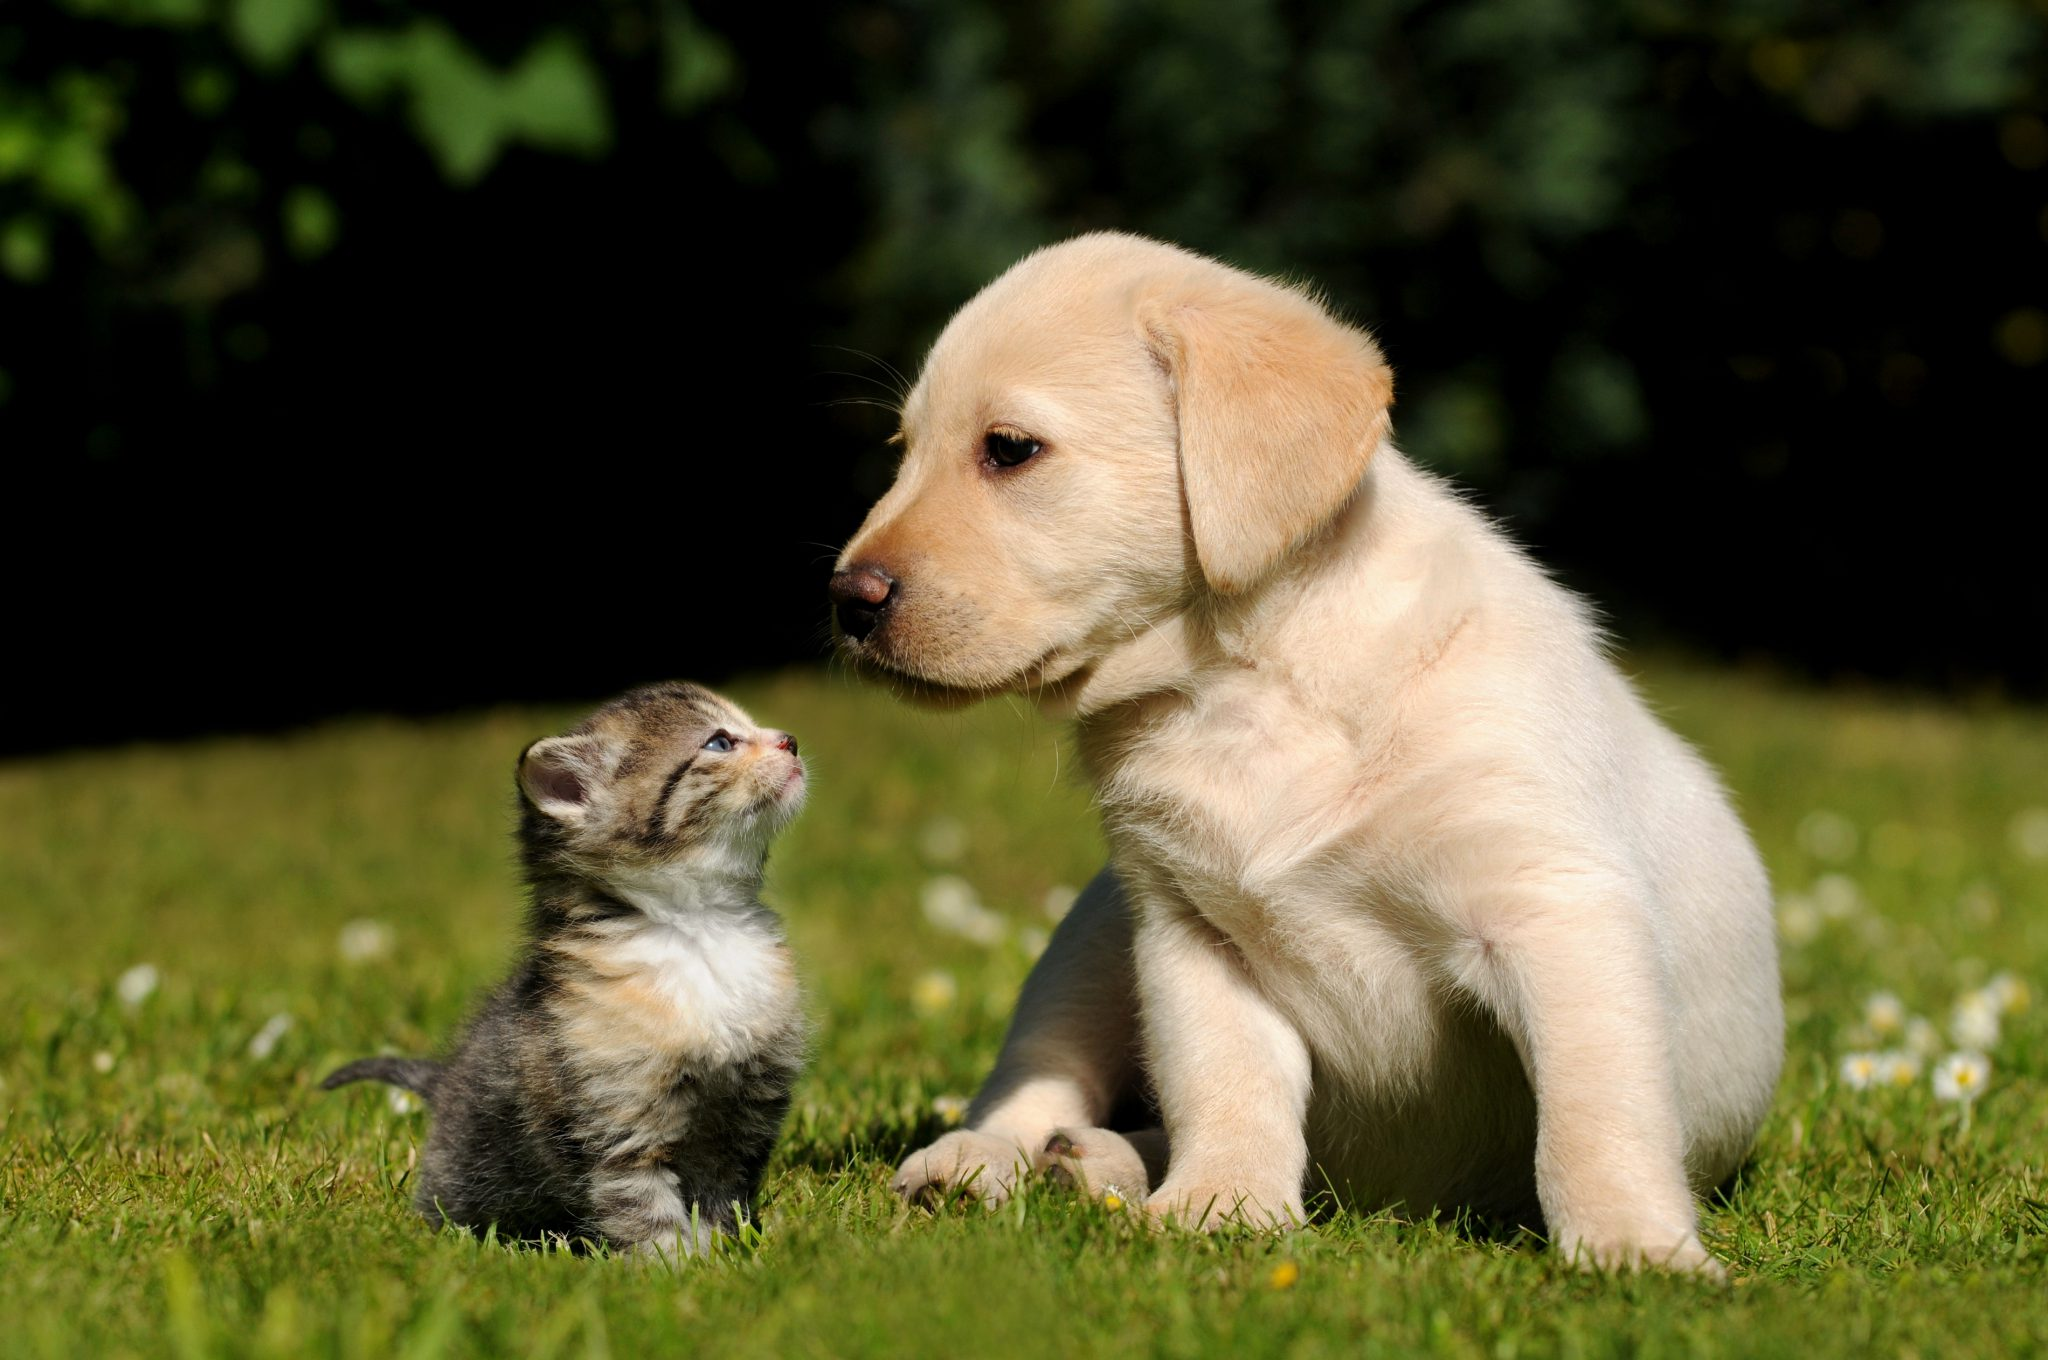

In [14]:
Image(filename='/content/yolov3/detected/images/14th_street.jpg', width=640)

* files.download( ) 사용

      files.download(filename=[파일 경로])

In [12]:
files.download(filename='/content/CatDog.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>